,0,Value For e
Charge,,
"(3, 0.2)",2.0,1.500000
"(3.2, 0.2)",2.0,1.600000
"(3.3, 0.2)",NaN,NaN
"(4.5, 0.3)",3.0,1.500000
"(4.7, 0.3)",3.0,1.566667
"(4.8, 0.2)",3.0,1.600000
"(5.9, 0.3)",4.0,1.475000
"(6, 0.3)",4.0,1.500000
"(6.2, 0.3)",4.0,1.550000


,0
Average e Value,1.540556
Standard Error,0.011544


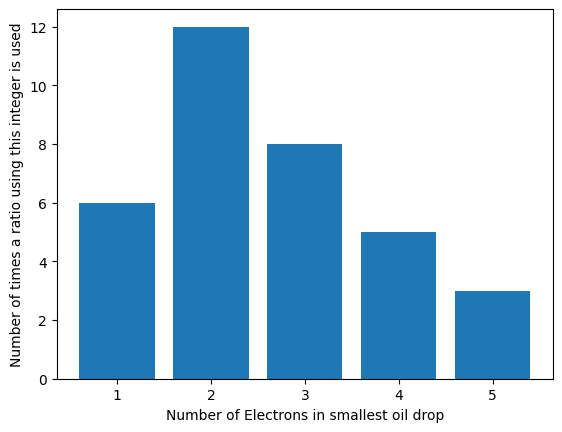

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import csv
from IPython.display import display

'''
This Script caluclates the number electrons on all oil drops by comparing the ratios of all calculated charges
of oil drops.
Note: in this script, although it is conter - intuitive, increasing the number of ratios that are compared to the 
ratios is charge, does not increase precision, but makes it more likely that calcualte an incorrect figure of n.
Look at this after doing the prelab work and supporting reasorces on blackboard
'''
'''
JUPYTER VERSION 
exactly the same as 'find_n_ratios.py' but was used to visualise dataframes and graphs easily 
'''

#converting csv taken from origin into list of tuples that can be used as e_n and the error
df = pd.read_csv("CSV.test.csv", skiprows=1)

# Convert two columns into a list of tuples
tuple_list = list(df.itertuples(index=False, name=None))
#print(tuple_list)  # Output: [(value1, error 1), (value3, error2), ...]


def get_ratios(numtor_range, denomtor_range):
    '''
    Gets the ratios chosen to compare to the electron ENs found
    Has a range from 1 to n for both numerators and denominators of the ratio
    returns as a list of lists that hold the numerator and deonenator so it is easier to compare visually,
    to find decimal ratio further calculation is required
    '''
    ratios = []
    for i in range(1,numtor_range+1):

        for j in range(i,denomtor_range+1):
            ratios.append((i,j))
    return ratios

# Values used from lab Prelab data 
e_n_vals = [4.7,3.2,3,6.2,4.8,7.8,3.3,7.7,6,5.9,3.2,7.6,6.3,4.5]
e_n_errors = [0.3,0.2,0.2,0.3,0.2,0.3,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.3]

e_n = list(zip(e_n_vals,e_n_errors)) 
e_n = sorted(e_n)

def uncertainty_in_ratio(a,b, own_uncertainty = 0):
    '''
    Finds the uncertainty in the ratio using error propagation and partial derivatives
    returns error as a float - in lab book it says to use fractional error, but should'nt 
    really make a difference
    '''
    if (own_uncertainty != 0):
        return own_uncertainty
    ratio_unc = np.sqrt(( a[1] / b[0] ) ** 2 + ( ( a[0] * b[1]) / b[0] ** 2 ) ** 2)
    
    return ratio_unc

def relating_ratios(e_n_list, num_range, den_range, own_uncertainty = 0): #need to allow to create own uncertainty
    '''
    inputs: e_n_list is a list of tupes of values and errors for all charges of e_n found;
            num_range is for numerator range in ratios wanted; den range is for denominators;
            own uncertainty is defaulted to zero, used if own uncertainty wants to be used for all values of e_n
    Using loweset e_n, finds ratios of all other e_ns
    Compares these to all ratios that were asked to be compared to, if ratios are within uncertainty calculated they are appended to a 
    dictionary key: (e_n, uncertainty) , value: all ratios within uncertainty
    dictionary is returned
    '''

    e_n_dict = {}

    ratios = get_ratios(num_range,den_range)
    e_n_list = sorted(e_n_list) # sorts list
    lowest_e_n = e_n_list[0] 
        
    for e_n_tup in e_n_list: #interates through tuples in lists of e_n 
        fit_ratios = []
        for ratio in ratios: #iterating though all ratios

            e_n_rat = (lowest_e_n[0] / e_n_tup[0], uncertainty_in_ratio(lowest_e_n, e_n_tup, own_uncertainty)) #new tuple contating ratio and uncertainty
            dec_ratio = ratio[0] / ratio[1] #decimal ratio for set ratios

            if (dec_ratio > e_n_rat[0] - e_n_rat[1] and dec_ratio < e_n_rat[0] + e_n_rat[1]): #  not right
                fit_ratios.append(ratio)
        
        e_n_dict[e_n_tup] = fit_ratios #added to dictionary as a list of rations involved
    return e_n_dict

def finding_n_count(dict_of_ratios, posssible_n):
    '''
    Counts how many times the integer in the numerator is used to help find the number 
    of electrons in the smallest oil drop
    Returns: List of "likelyness" of the number of electrons on the smalles oil drop
    index 0 of the list represents n = 1, index 1 => n = 2 ect..
    '''
    list_of_possible_n = []
    number_poss_n = []
    #for i in np.nditer(df_of_ratios.to_numpy()):
    for i in dict_of_ratios.values():
        for j in i:
            list_of_possible_n.append(j[0])
    for i in range(1, posssible_n + 1):
        number_poss_n.append(list_of_possible_n.count(i))
    return number_poss_n

def maximums_list(lst):
    '''
    finds index for maximum n, accounts for mutiple maximums
    not really necessary as can be easily found from bar graph
    '''
    max_value = max(lst)
    max_indices = [i for i, v in enumerate(lst) if v == max_value]
    max_n = [i + 1 for i in max_indices]
    return max_n


def assign_num_e_n(dict_all_ratios, n):
    """
    Finds the number of electrons for all given charges and arranges them in rows.
    Returns Pandas DataFrame
    """
    expect_rat = {key: [val[1] for val in values if val[0] == n] for key, values in dict_all_ratios.items()}
    
    # Convert to DataFrame with keys as rows
    df_ratio = pd.DataFrame.from_dict(expect_rat, orient='index')
    
    df_ratio.index.name = 'Charge'
    
    return df_ratio

#initial conditions
max_numerator = 5
max_denominator = 6

dic = relating_ratios(e_n, max_numerator,max_denominator) # dictionary of all ratios within error for each oil drop
list_of_count = finding_n_count(dic, max_numerator) 
list_n = [i + 1 for i in range(max_numerator)] #list of all values of number of electrons that could be on the oil drop
min_n =  maximums_list(list_of_count) # finds number of electrons on smallest oil drop

e_m_df = assign_num_e_n(dic, min_n[0]) 
y = [sublist[0] for sublist in list(e_m_df.index)] # gives values of e_n for all oildrops using dataFrame
e_m_df["Value For e"] = y / e_m_df[0] 


e_values = e_m_df["Value For e"]
stats_dict = {
    "Average e Value" : e_values.mean(),
    "Standard Error" : (e_values.std() / np.sqrt(len(e_values)))
}


stats_df = pd.DataFrame.from_dict(stats_dict, orient='index') # this is not used for final value
                                                              # as a graph is supposed to be plotted
                                                              # this is shown in finding_e_polt.py

plt.bar(list_n, list_of_count)
plt.xlabel("Number of Electrons in smallest oil drop")
plt.ylabel("Number of times a ratio using this integer is used")

display(e_m_df)
display(stats_df)